In [63]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### importing classes from sklearn library for standardization and normalization 

In [64]:
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import MinMaxScaler # for normalization

### importing a default dataset from sns github repo

In [65]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [66]:
# choosing only few neumeric features
df2 = df[['survived',"pclass",'age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [67]:
# checking for null valuues before feature scaling
df2.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

[]

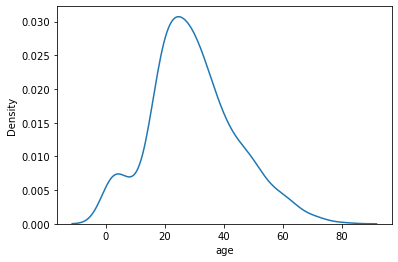

In [68]:
sns.distplot(df2['age'],hist=False)
plt.plot()

In [69]:
# since almost gaussian distribution
# so we can use mean to fill in the missing values
df2['age']= df2['age'].fillna(df2['age'].mean())

In [70]:
df2.isnull().sum() 

survived    0
pclass      0
age         0
parch       0
dtype: int64

### Creating a matrix of features and a dependent variable vector

In [71]:
# here survived is the dependent variable
X = df2.drop('survived',axis=1)
y  = df2['survived']
print(X.shape, y.shape)

(891, 3) (891,)


### We split the dataset into train and test set 

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(712, 3) (179, 3) (712,) (179,)


## Standardization

### We learn mean and std.devn of all features in the train dataset using StandardScaler() class

In [73]:
sc = StandardScaler()
sc.fit(X_train)
print(sc.mean_,sc.scale_)

[ 2.30617978 29.55409121  0.39185393] [ 0.84405789 12.99162985  0.79647463]


### Now we transform our training data set and test data set with the above learnt values

In [74]:
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)
X_train_sc
# we obtain our train and test data as 2-D numpy arrays

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

### Now we convert the obtained 2-D numpy arrays after transformation into data frames

In [75]:
X_train_sc = pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [76]:
X_train_sc.head(5)

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [77]:
X_test_sc.head(5)

,pclass,age,parch
0,-1.547500,0.804049,-0.491985
1,0.822005,0.188268,-0.491985
2,0.822005,0.034323,-0.491985
3,-1.547500,0.011163,-0.491985
4,-0.362747,0.342213,0.763547


### We can now see the distribution of train and test data if we want 

In [78]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [82]:
X_test_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.01,0.06,-0.06
std,0.95,1.00,1.06
min,-1.55,-2.21,-0.49
25%,-0.36,-0.47,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.88,7.04


## Normalization

### We learn min and max value of of all features in the train dataset using MinMaxScaler() class 

In [84]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

### We transform our test and train data set using the above learnt values 

In [86]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [88]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [89]:
X_test_mmc

array([[0.        , 0.56078209, 0.        ],
       [1.        , 0.44743553, 0.        ],
       [1.        , 0.41909889, 0.        ],
       [0.        , 0.4148359 , 0.        ],
       [0.5       , 0.47577217, 0.2       ],
       [1.        , 0.44743553, 0.        ],
       [0.        , 0.65996033, 0.        ],
       [1.        , 0.22074242, 0.        ],
       [0.5       , 0.9291584 , 0.        ],
       [0.        , 0.2065741 , 0.2       ],
       [0.5       , 0.43326721, 0.        ],
       [0.5       , 0.39076226, 0.        ],
       [0.        , 0.63162369, 0.        ],
       [1.        , 0.31992066, 0.        ],
       [1.        , 0.57495041, 1.        ],
       [0.5       , 0.3482573 , 0.        ],
       [0.5       , 0.50410881, 0.4       ],
       [1.        , 0.4148359 , 0.        ],
       [1.        , 0.4148359 , 0.        ],
       [0.5       , 0.26324738, 0.        ],
       [1.        , 0.4148359 , 0.        ],
       [0.5       , 0.24907906, 0.        ],
       [1.

### Converting the numpy arrays into dataframes 

In [92]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [94]:
X_train_mmc.head(5)

,pclass,age,parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4


In [95]:
X_test_mmc.head(5)

,pclass,age,parch
0,0.0,0.560782,0.0
1,1.0,0.447436,0.0
2,1.0,0.419099,0.0
3,0.0,0.414836,0.0
4,0.5,0.475772,0.2


### Now we can see the data distribution to find that the min value is 0 and max value is 1

In [97]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


In [98]:
X_test_mmc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.66,0.42,0.07
std,0.40,0.18,0.17
min,0.00,0.01,0.00
25%,0.50,0.33,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.13,1.20
